In [1]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures
import graphviz #to visualize decision trees

In [2]:
df = pd.read_csv('cleaned_data.csv')

In [3]:
features_response = df.columns.tolist()

In [4]:
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']

In [5]:
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import tree

In [7]:
X_train, X_test, y_train, y_test = \
train_test_split(df[features_response[:-1]].values, df['default payment next month'].values,
test_size=0.2, random_state=24)

In [8]:
dt = tree.DecisionTreeClassifier(max_depth=2)

In [9]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [10]:
dot_data = tree.export_graphviz(dt, out_file=None, filled=True,
                                rounded=True, feature_names=features_response[:-1],
                                proportion=True, class_names=['Not defaulted', 'Defaulted'])

In [11]:
graph = graphviz.Source(dot_data) 
graph

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [12]:
features_response[:-1].index('PAY_1')

4

In [13]:
X_train.shape

(21331, 17)

In [14]:
sum(X_train[:,4] <= 1.5)/X_train.shape[0]

0.8946134733486475

In [15]:
np.mean(y_train)

0.223102526838873

In [16]:
pm0 = np.linspace(0.01,0.99,99)

In [17]:
pm1 = 1 - pm0
misclassification_rate = np.minimum(pm0, pm1)

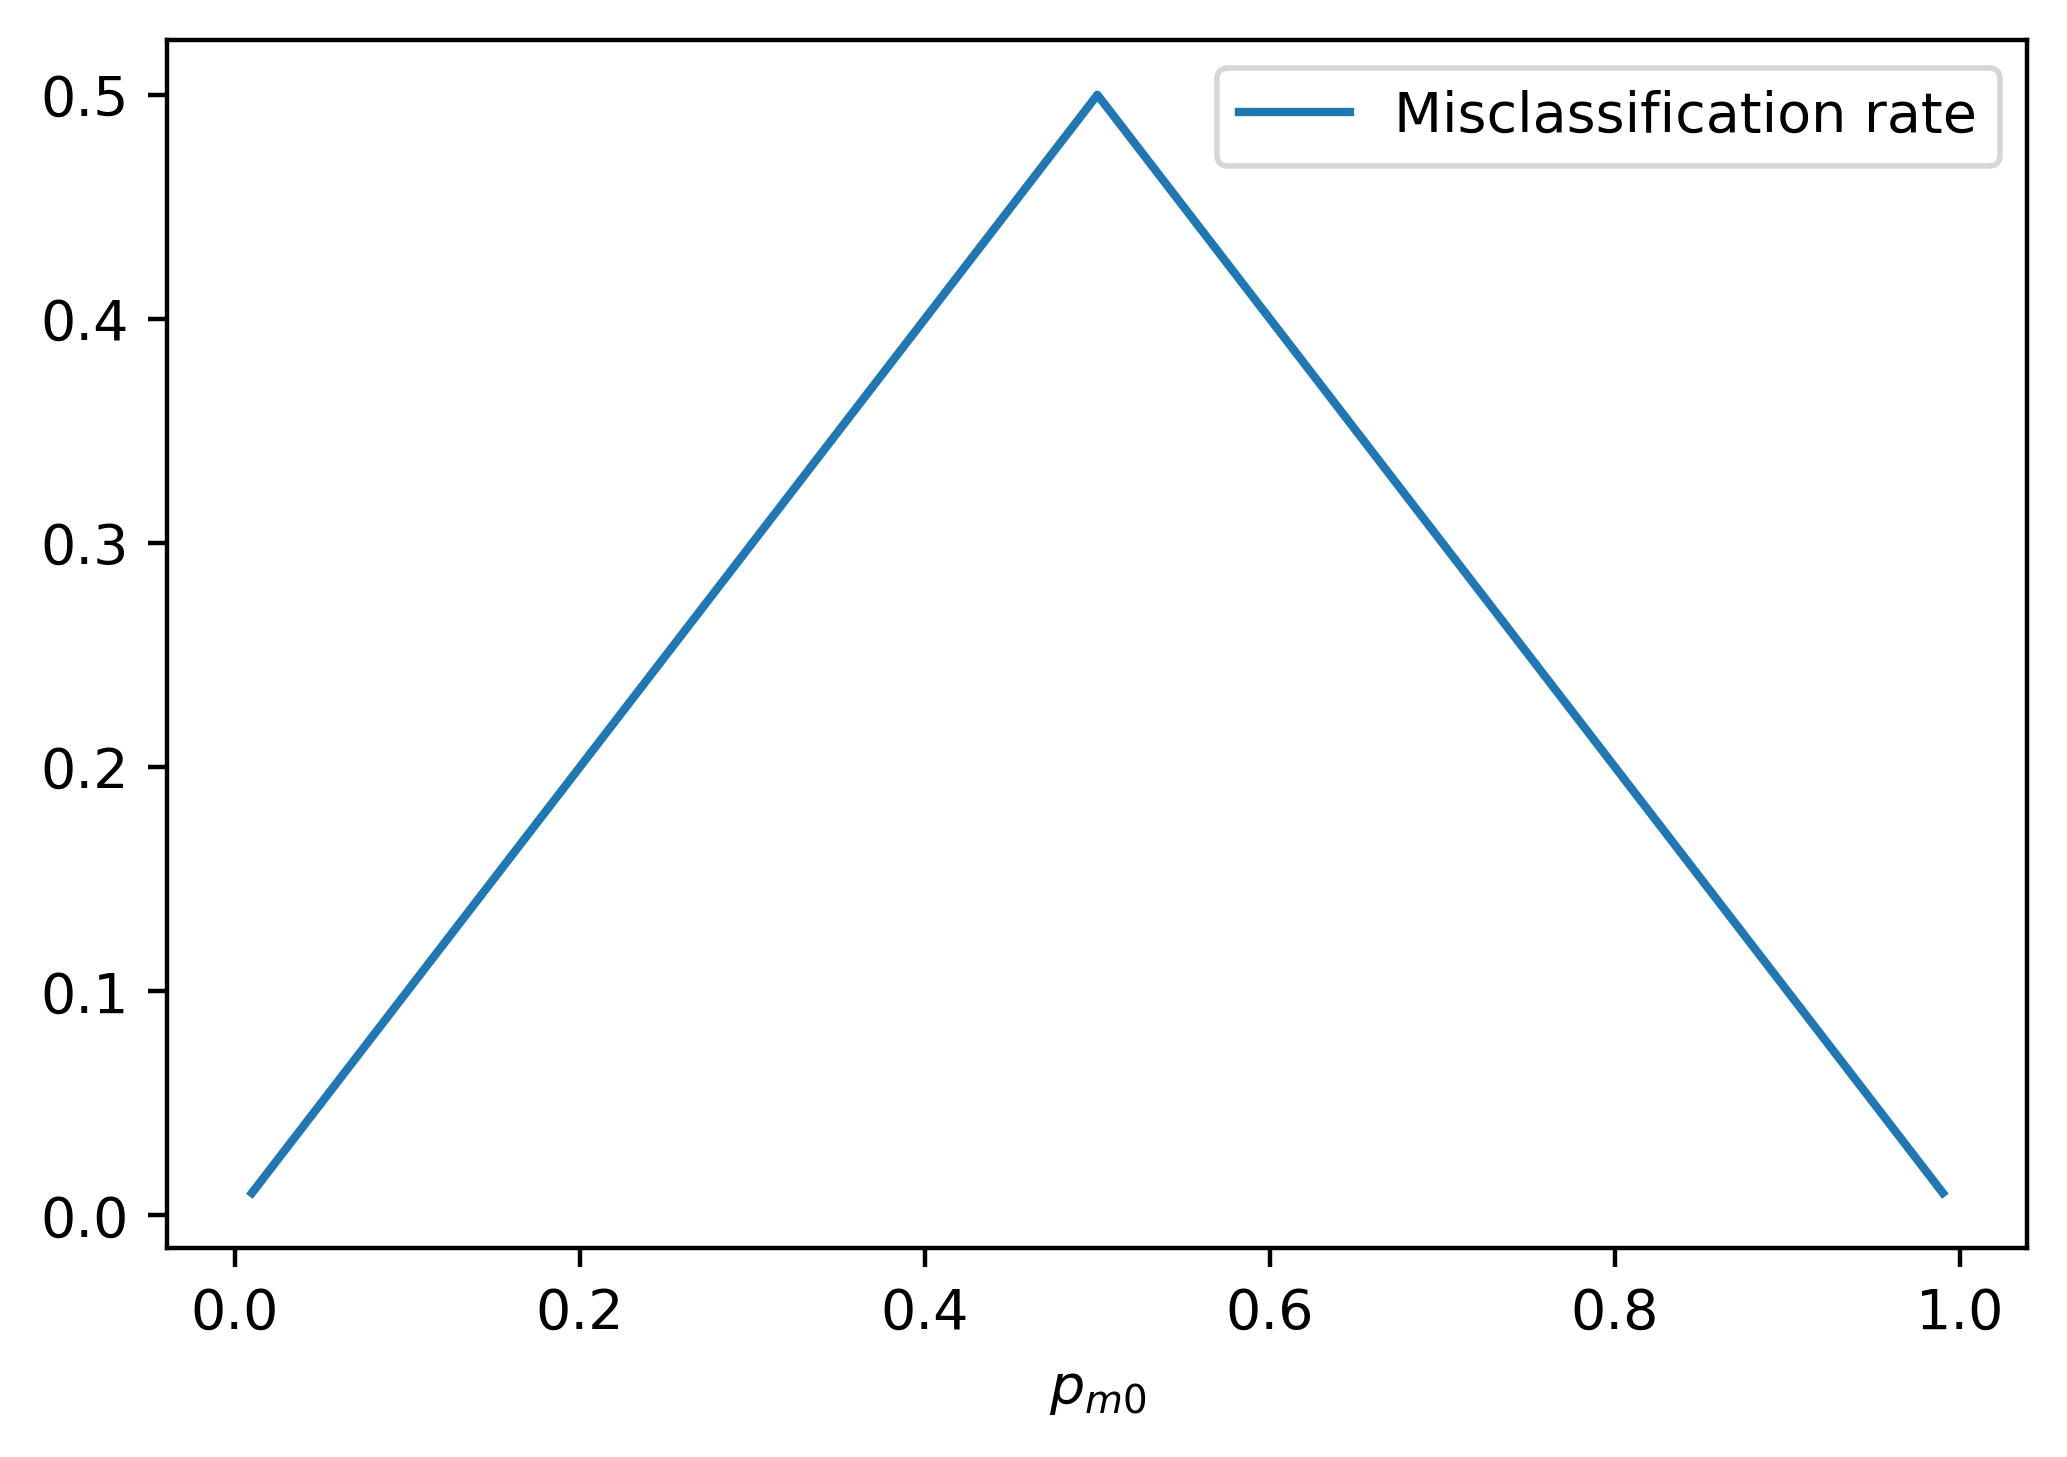

In [18]:
mpl.rcParams['figure.dpi'] = 400
plt.plot(pm0, misclassification_rate, label='Misclassification rate')
plt.xlabel('$p_{m0}$')
plt.legend()

In [19]:
gini = (pm0*(1-pm0)) + (pm1*(1-pm1))

In [20]:
cross_ent = -1*((pm0*np.log(pm0)) + (pm1*np.log(pm1)))

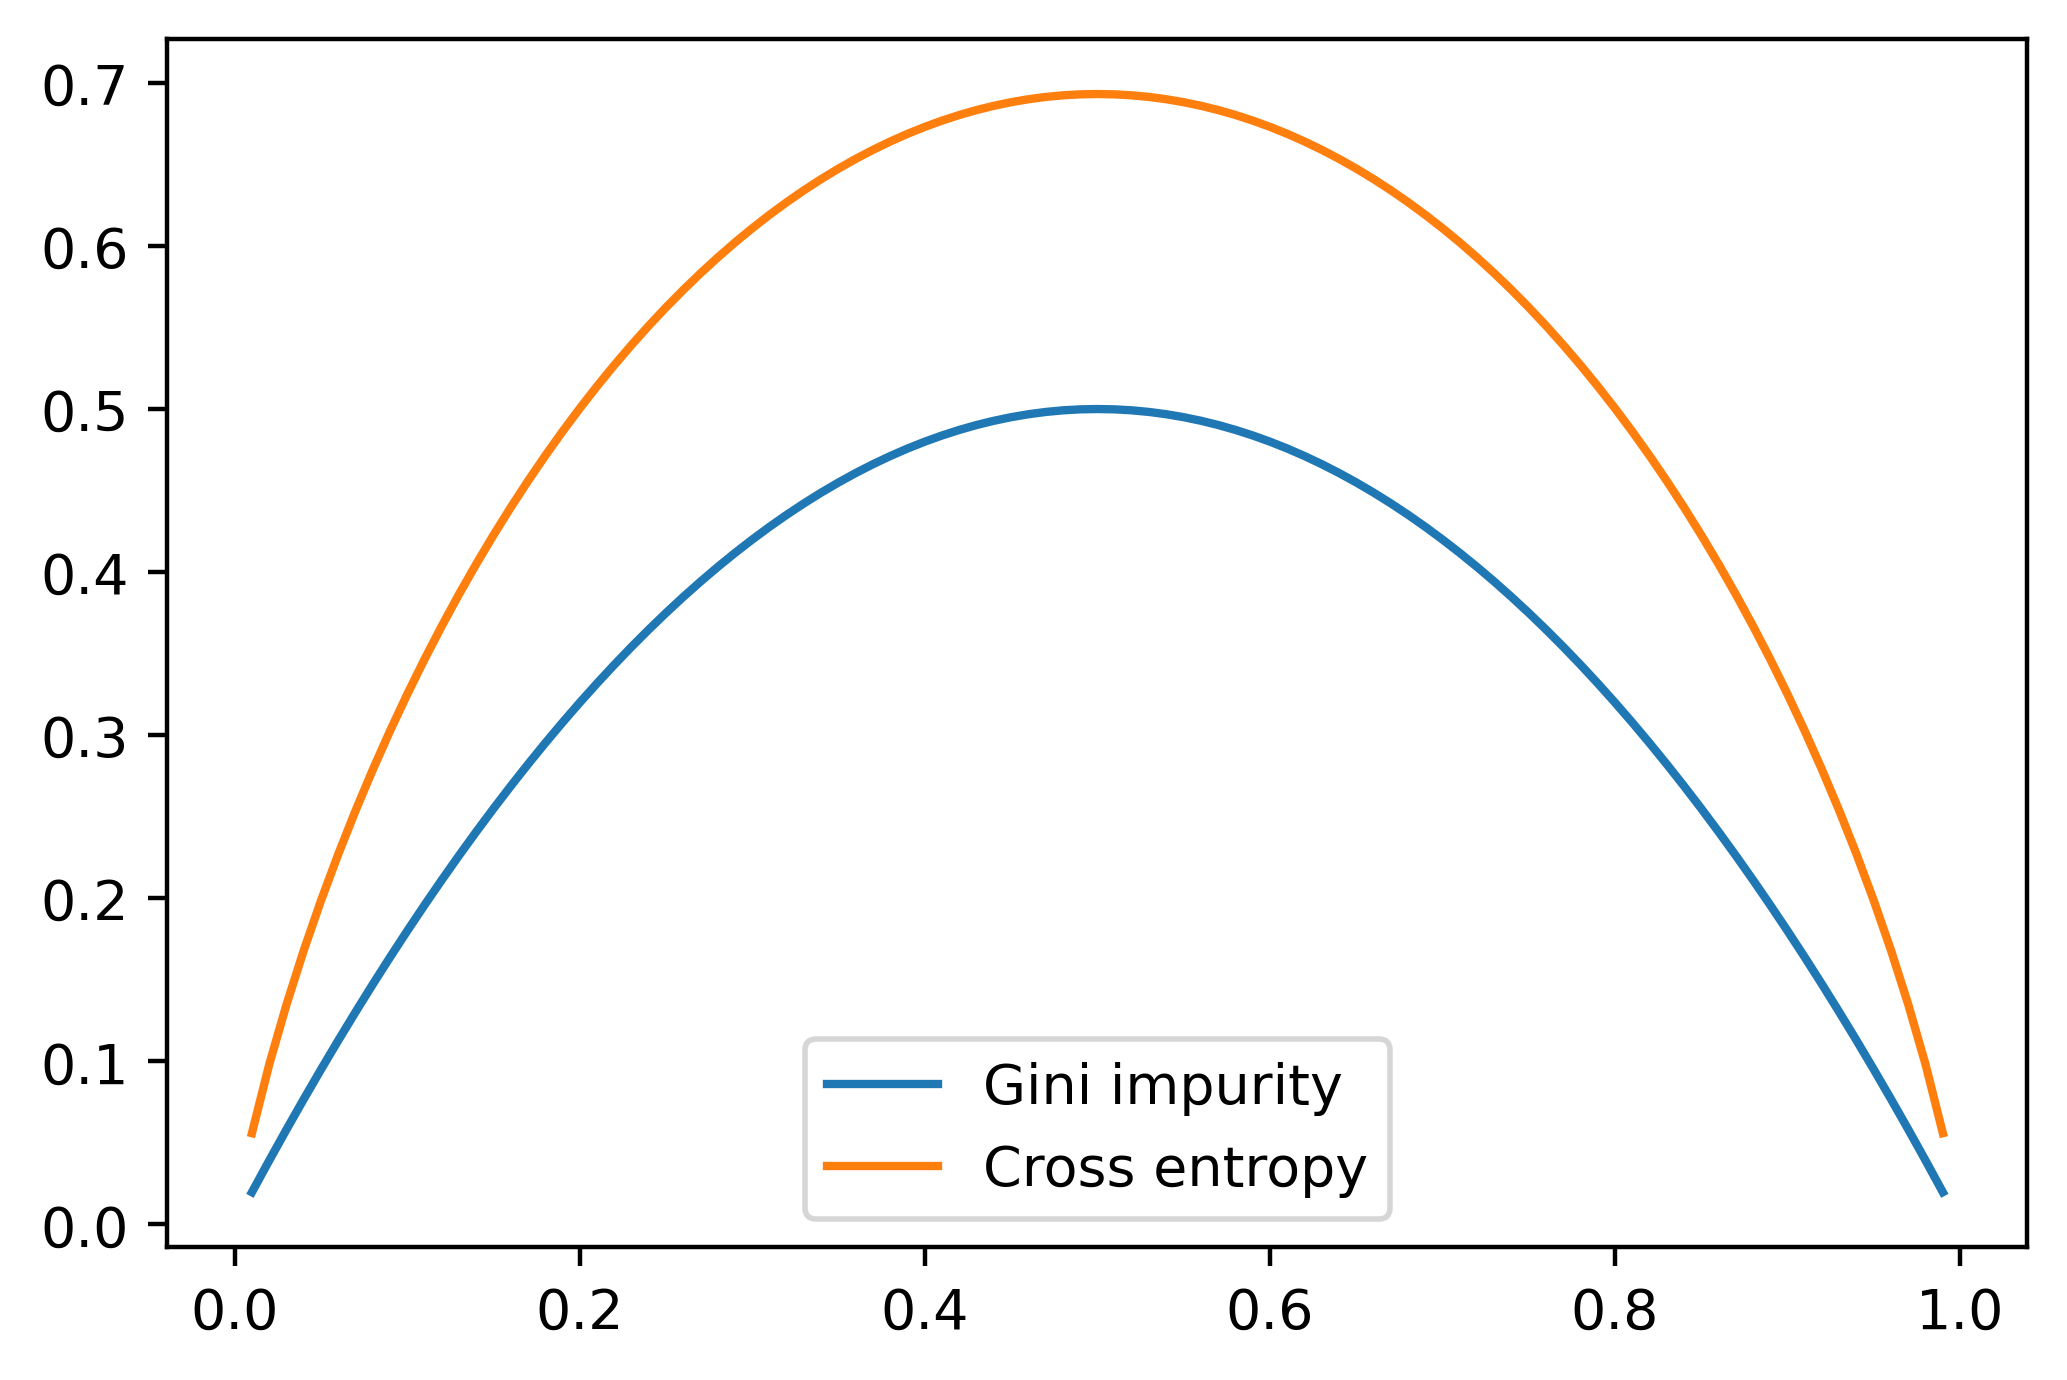

In [21]:
plt.plot(pm0, gini, label='Gini impurity')
plt.plot(pm0, cross_ent, label='Cross entropy')
plt.legend()

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
X_train.shape

(21331, 17)

In [24]:
params = {'max_depth':[1, 2, 4, 6, 8, 10, 12]}

In [25]:
cv = GridSearchCV(dt, param_grid=params, scoring='roc_auc',
                  n_jobs=None, iid=False, refit=True, cv=4, verbose=1,
                  pre_dispatch=None, error_score=np.nan, return_train_score=True)

In [26]:
cv.fit(X_train, y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    3.3s finished
C:\Users\Aarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(max_depth=2), iid=False,
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12]},
             pre_dispatch=None, return_train_score=True, scoring='roc_auc',
             verbose=1)

In [27]:
cv_results_df = pd.DataFrame(cv.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.025934,0.005197,0.013360,0.019112,1,{'max_depth': 1},0.639514,0.643398,0.651891,0.650753,0.646389,0.005136,7,0.648680,0.647384,0.644553,0.644934,0.646388,0.001712
1,0.040656,0.000814,0.002245,0.000429,2,{'max_depth': 2},0.695134,0.699022,0.713376,0.699510,0.701761,0.006917,5,0.704034,0.702700,0.698113,0.702535,0.701845,0.002232
2,0.077049,0.001898,0.002495,0.000498,4,{'max_depth': 4},0.732720,0.741078,0.746946,0.743731,0.741119,0.005276,2,0.756882,0.752421,0.749368,0.753055,0.752932,0.002673
3,0.117909,0.007014,0.002743,0.000434,6,{'max_depth': 6},0.744607,0.745998,0.751453,0.741517,0.745894,0.003596,1,0.782202,0.780125,0.775228,0.774750,0.778076,0.003178
4,0.148377,0.010550,0.002745,0.000432,8,{'max_depth': 8},0.727383,0.731400,0.750485,0.728923,0.734548,0.009312,3,0.811837,0.808245,0.803415,0.802004,0.806375,0.003911
5,0.172545,0.000695,0.003242,0.000433,10,{'max_depth': 10},0.710749,0.701755,0.718921,0.716357,0.711946,0.006584,4,0.848906,0.854439,0.841262,0.836010,0.845154,0.007054
6,0.199724,0.002049,0.003482,0.000848,12,{'max_depth': 12},0.676384,0.660108,0.674850,0.682746,0.673522,0.008291,6,0.889984,0.903348,0.885721,0.876169,0.888806,0.009773


In [28]:
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

Text(0, 0.5, 'ROC AUC')

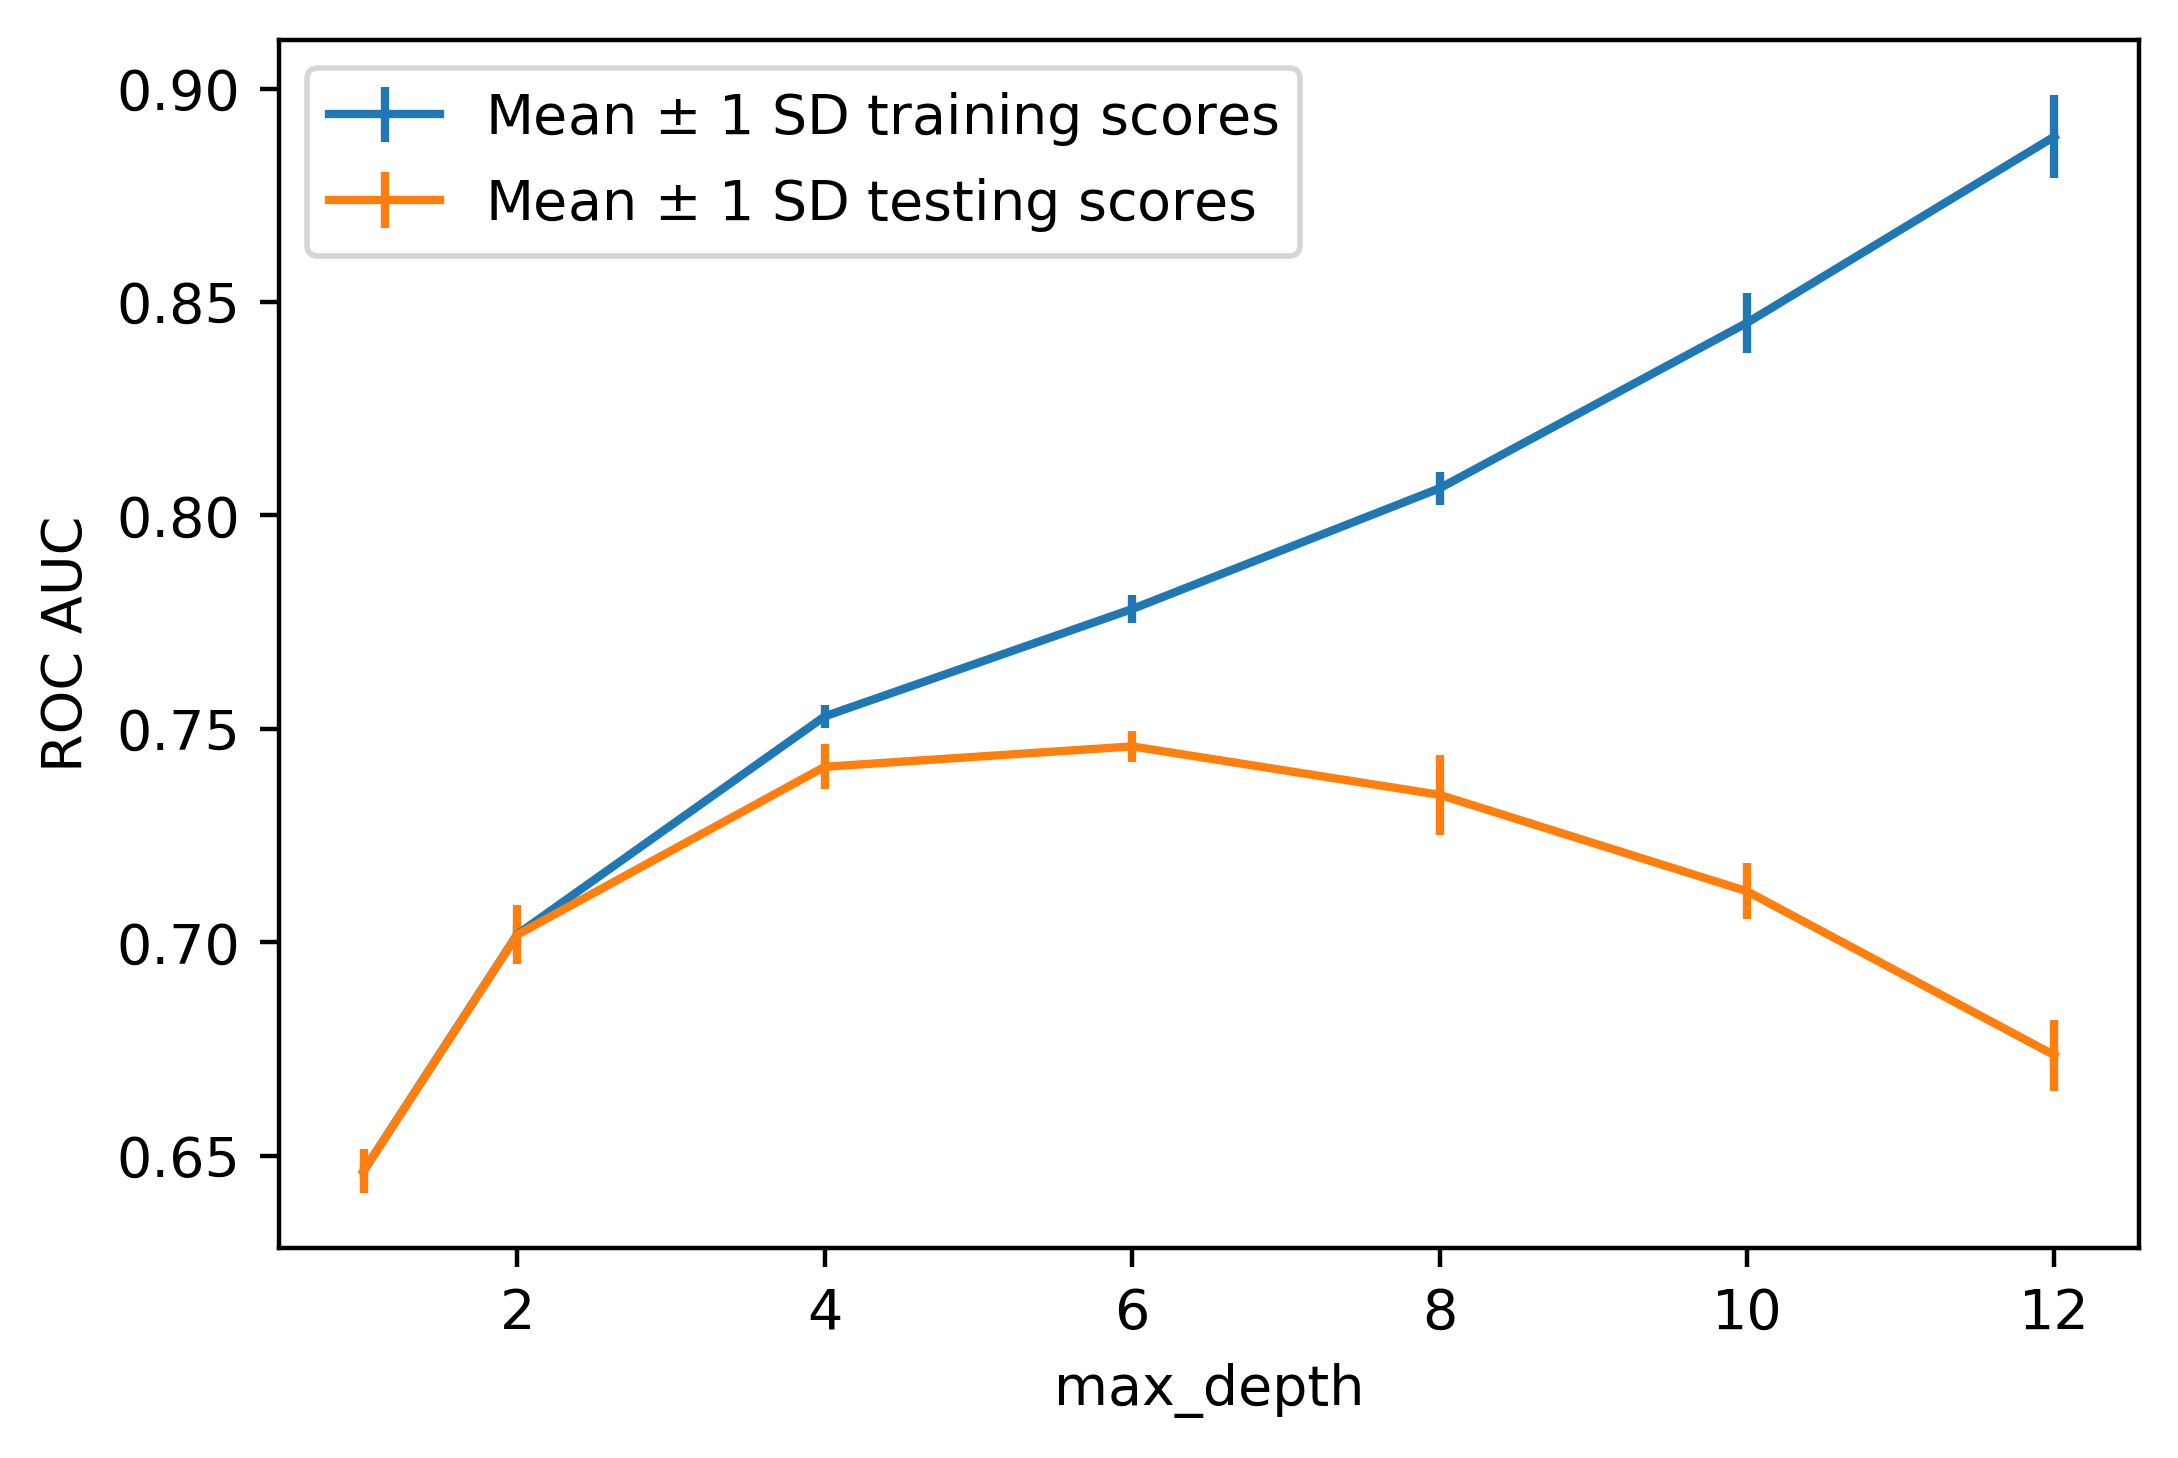

In [29]:
ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_train_score'],
            yerr=cv_results_df['std_train_score'],
            label='Mean $\pm$ 1 SD training scores')
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_test_score'],
            yerr=cv_results_df['std_test_score'],
            label='Mean $\pm$ 1 SD testing scores')
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rf = RandomForestClassifier(
    n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False, class_weight=None)

In [32]:
rf_params_ex = {'n_estimators':list(range(10,110,10))}

In [33]:
cv_rf_ex = GridSearchCV(rf, param_grid=rf_params_ex, scoring='roc_auc',
                        n_jobs=None, iid=False, refit=True, cv=4, verbose=1,
                        pre_dispatch=None, error_score=np.nan, return_train_score=True)

In [34]:
cv_rf_ex.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   32.3s finished
C:\Users\Aarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=3, n_estimators=10,
                                              random_state=4),
             iid=False,
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             pre_dispatch=None, return_train_score=True, scoring='roc_auc',
             verbose=1)

In [35]:
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)

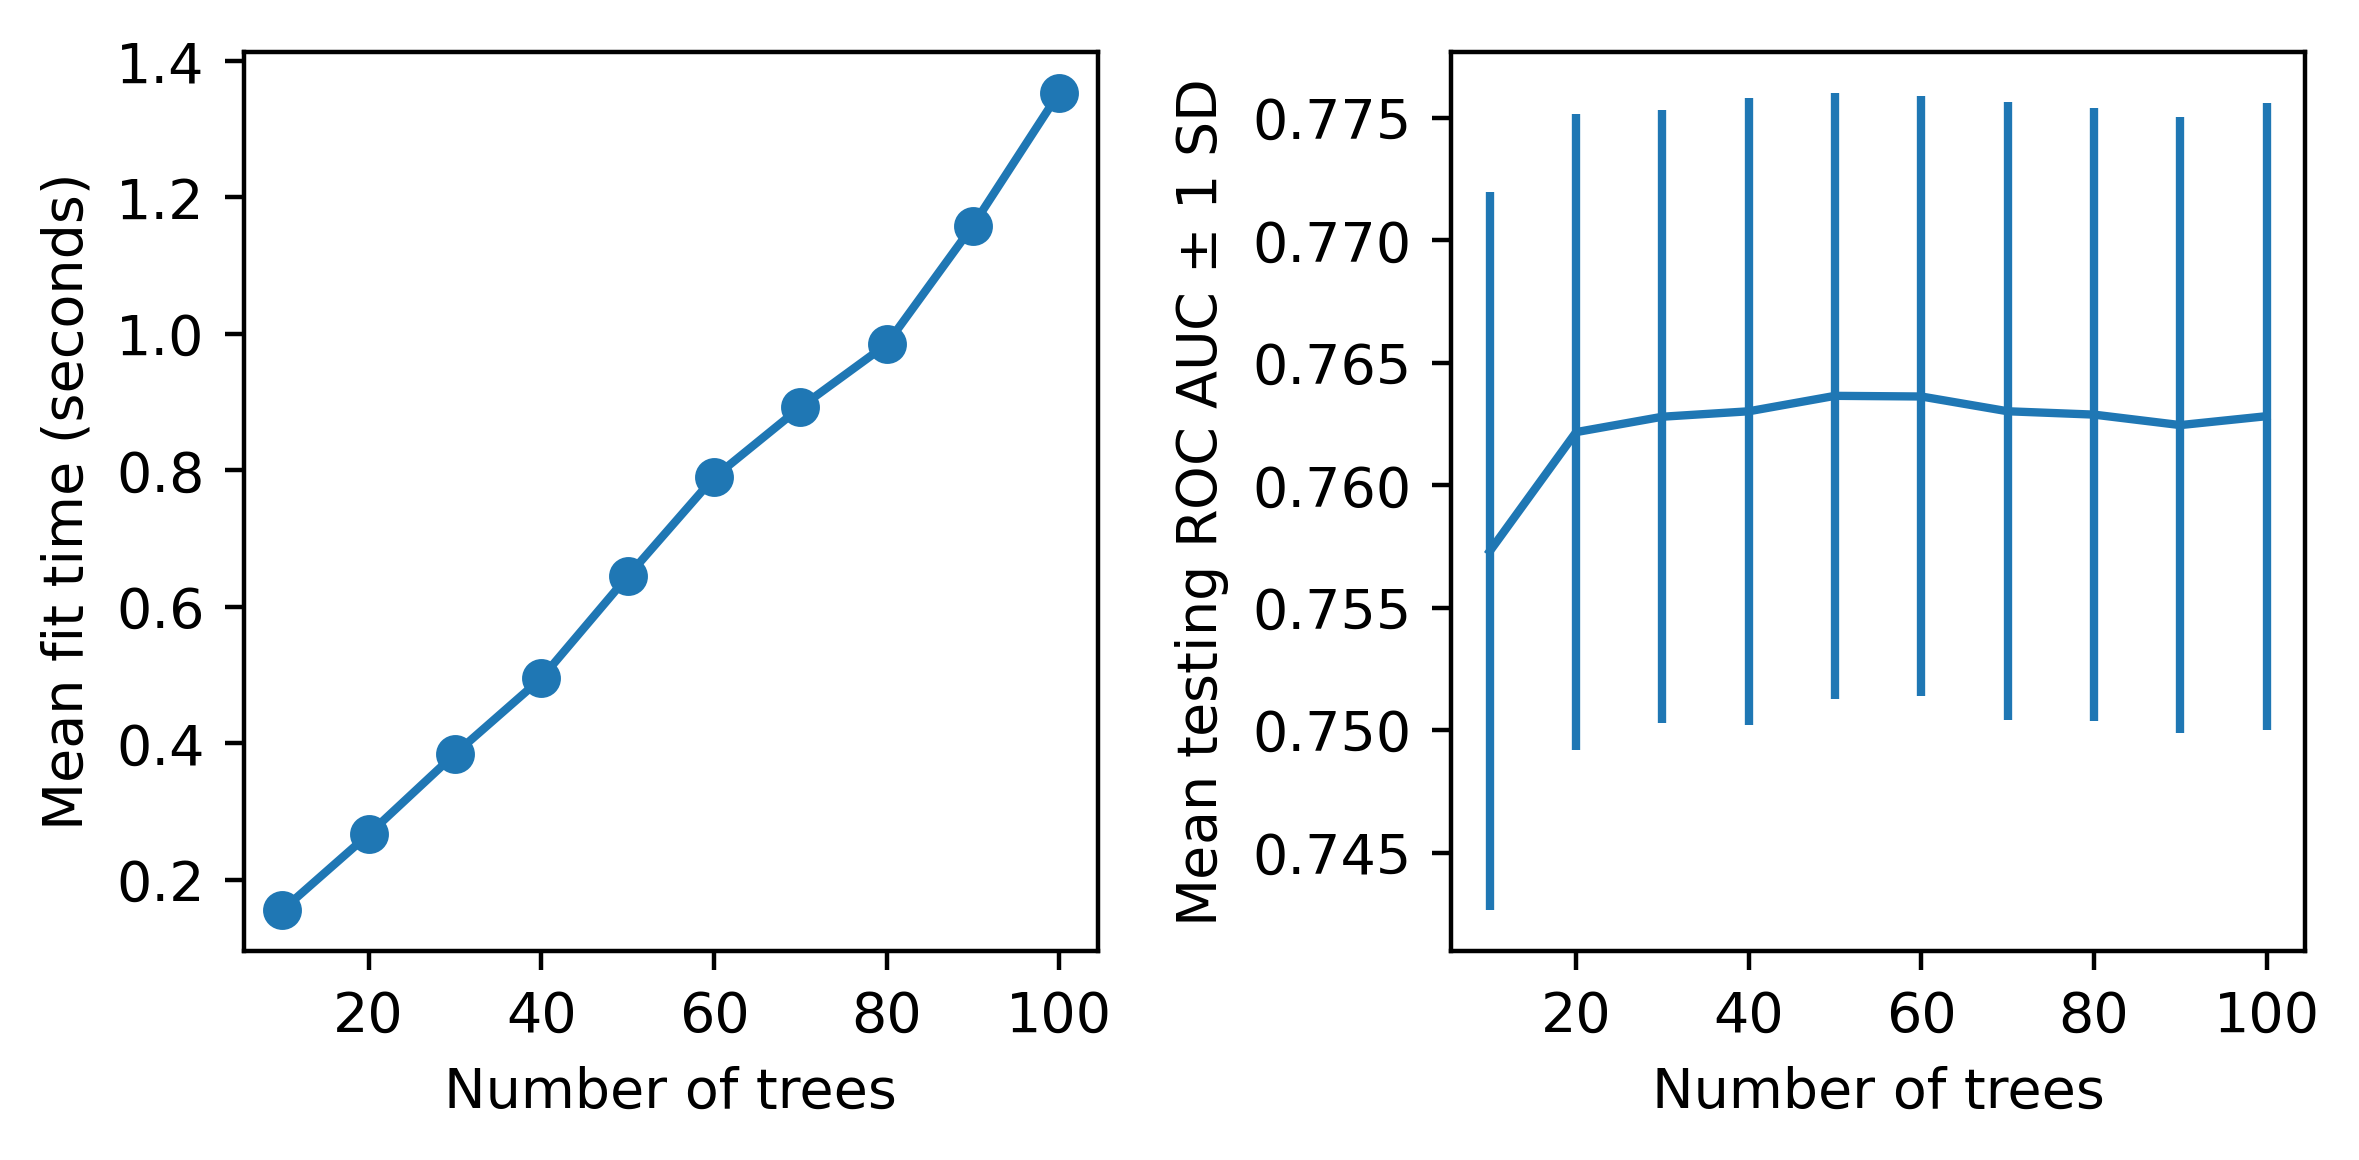

In [36]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axs[0].plot(cv_rf_ex_results_df['param_n_estimators'],
            cv_rf_ex_results_df['mean_fit_time'],
            '-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[1].errorbar(cv_rf_ex_results_df['param_n_estimators'],
                cv_rf_ex_results_df['mean_test_score'],
                yerr=cv_rf_ex_results_df['std_test_score'])
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SD ')
plt.tight_layout()

In [37]:
cv_rf_ex.best_params_

{'n_estimators': 50}

In [38]:
feat_imp_df = pd.DataFrame({
    'Feature name':features_response[:-1],
    'Importance':cv_rf_ex.best_estimator_.feature_importances_
})
feat_imp_df.sort_values('Importance', ascending=False)

,Feature name,Importance
4,PAY_1,0.609609
11,PAY_AMT1,0.094123
0,LIMIT_BAL,0.079265
13,PAY_AMT3,0.047067
12,PAY_AMT2,0.035393
6,BILL_AMT2,0.022422
14,PAY_AMT4,0.021164
15,PAY_AMT5,0.015962
10,BILL_AMT6,0.014293
8,BILL_AMT4,0.013454


In [39]:
xx_example, yy_example = np.meshgrid(range(5), range(5))
print(xx_example)
print(yy_example)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]


In [40]:
z_example = np.arange(1,17).reshape(4,4)
z_example

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

Text(0, 0.5, 'Y coordinate')

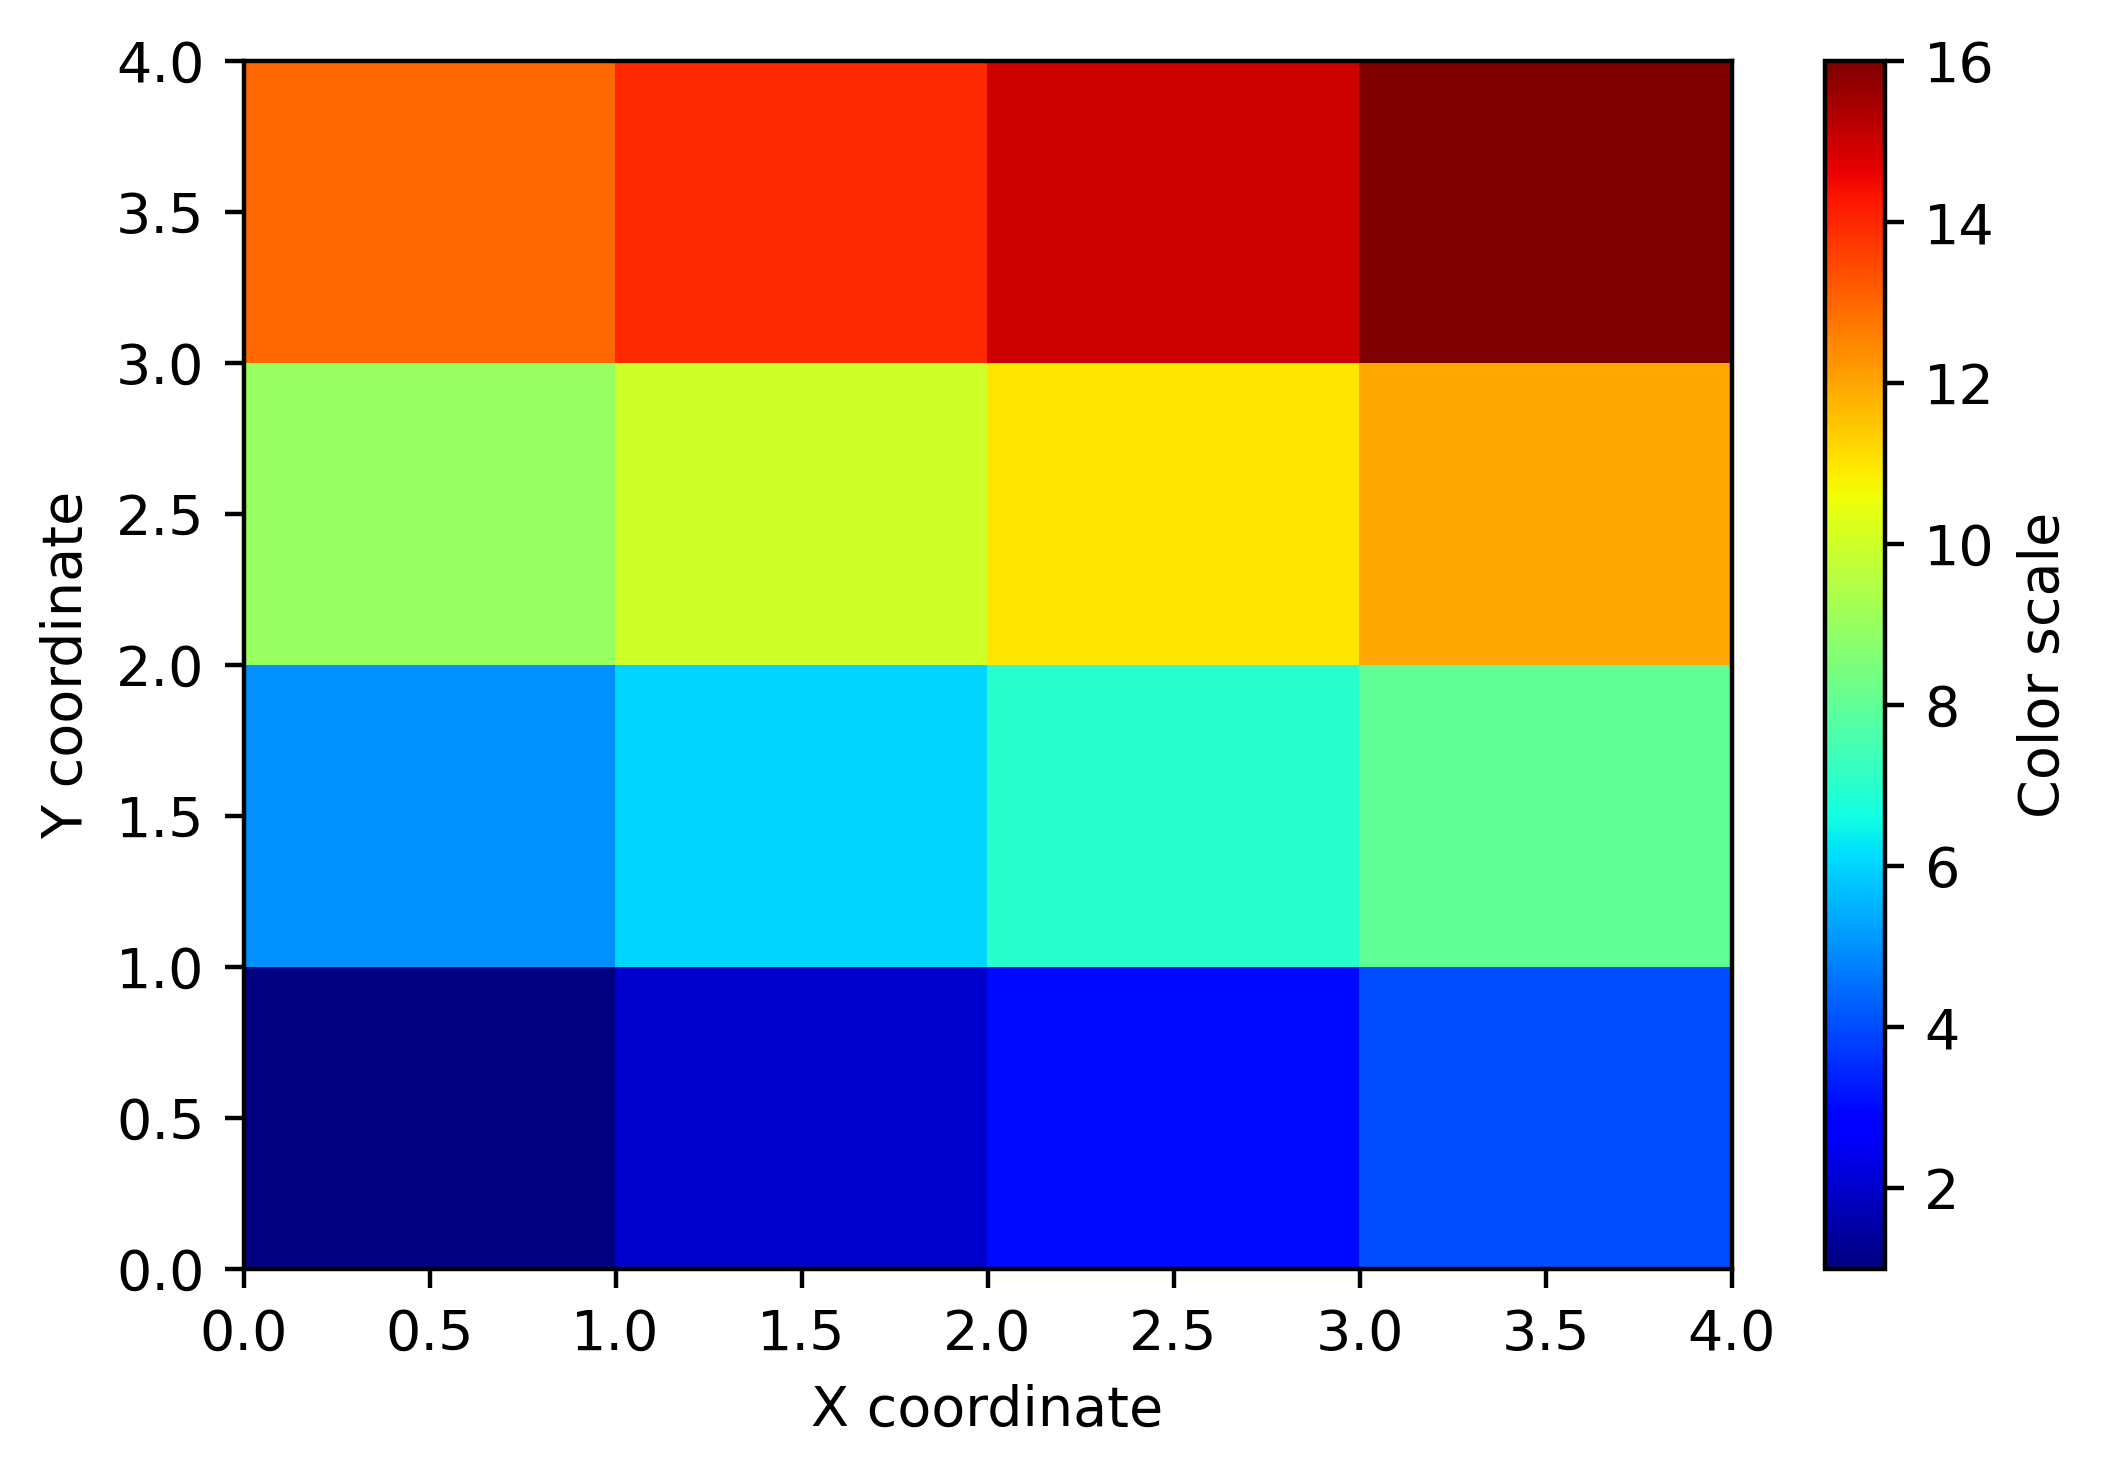

In [41]:
ax = plt.axes()
pcolor_ex = ax.pcolormesh(xx_example, yy_example, z_example, cmap=plt.cm.jet)
plt.colorbar(pcolor_ex, label='Color scale')
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')